In [1]:
import numpy as np
import pandas as pd
import altair as alt

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [4]:
i=1
def to_altair(x):    
    x.to_json('chart' + str(i)+'.json', orient='records', date_format='iso')
    return('chart' + str(i)+'.json')
pd.DataFrame.to_altair = to_altair

In [5]:
urld = "https://raw.githubusercontent.com/t0nyj/AbnormalDistribution/master/input/athlete_events.csv?token=ACVHZKYZGRLR5JWHEI4MJGK5LBHXM"
urlr = "https://raw.githubusercontent.com/t0nyj/AbnormalDistribution/master/input/noc_regions.csv?token=ACVHZK55UTLJIICN62S5REK5LBHY4"

In [6]:
data = pd.read_csv(urld)
regions = pd.read_csv(urlr)

In [7]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [10]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [11]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [12]:
merged.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [13]:
gold = merged[(merged.Medal=='Gold')]

In [14]:
gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [15]:
gold.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [16]:
gold=gold[np.isfinite(gold['Age'])]

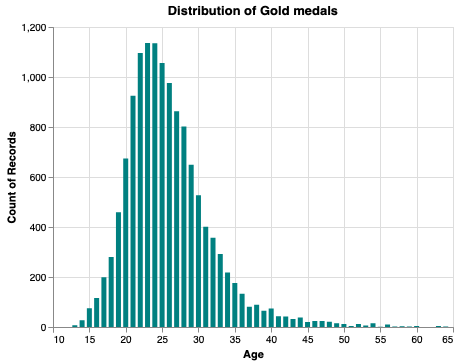

In [17]:
alt.Chart(gold.to_altair()).mark_bar(color='teal').encode(
x=alt.X('Age:Q'),
y='count()').properties(
title='Distribution of Gold medals')

In [18]:
gold['ID'][gold['Age']>50].count()

65

In [19]:
gold['ID'][gold['Age']<15].count()

34

In [20]:
aged_sport=gold['Sport'][gold['Age']>50]
aged_sport=pd.DataFrame(aged_sport)
young_sport=gold['Sport'][gold['Age']<15]
young_sport=pd.DataFrame(young_sport)

In [21]:
i=i+1
old = alt.Chart(aged_sport.to_altair()).mark_bar(size=15).encode(
y='Sport:N',
x='count()',
color=alt.Color('Sport:N', legend=None)).properties(title = "Gold medalists older than 50")
i=i+1
young=alt.Chart(young_sport.to_altair()).mark_bar(size=15).encode(
y='Sport:N',
x='count()',
color=alt.Color('Sport:N', legend=None)).properties(title="Gold medalists younger than 15")

In [22]:
main1 = old|young

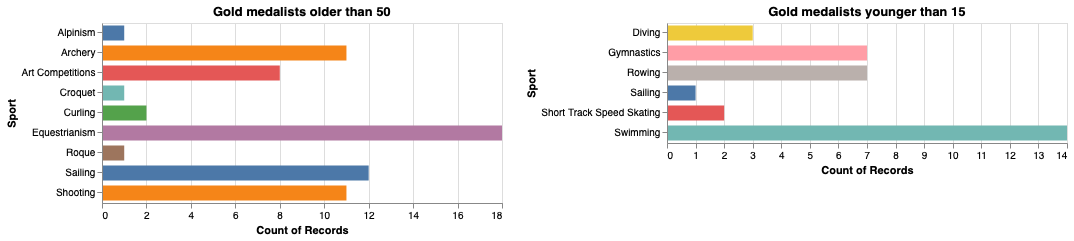

In [23]:
main1

In [24]:
women = merged[(merged['Sex']=='F') &( merged['Season']=='Summer')]

In [25]:
women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


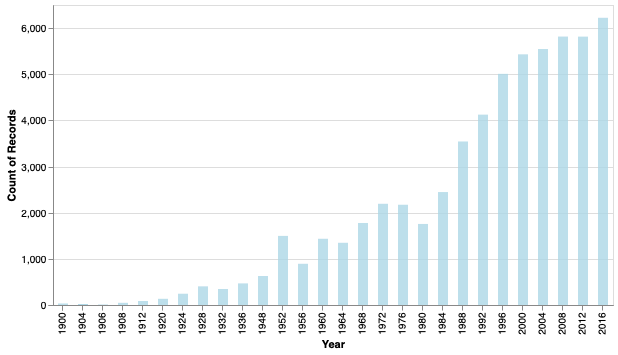

In [26]:
i=i+1
alt.Chart(women.to_altair()).mark_bar(color='lightblue',size=10).encode(
x='Year:O',
y='count()',
opacity=alt.value(.8)).properties()

In [27]:
gold.groupby('region')['region'].count().reset_index(
    name='Medals').sort_values(
    by=['Medals'], ascending=False).head()

,region,Medals
88,USA,2627
70,Russia,1599
32,Germany,1293
87,UK,657
42,Italy,567


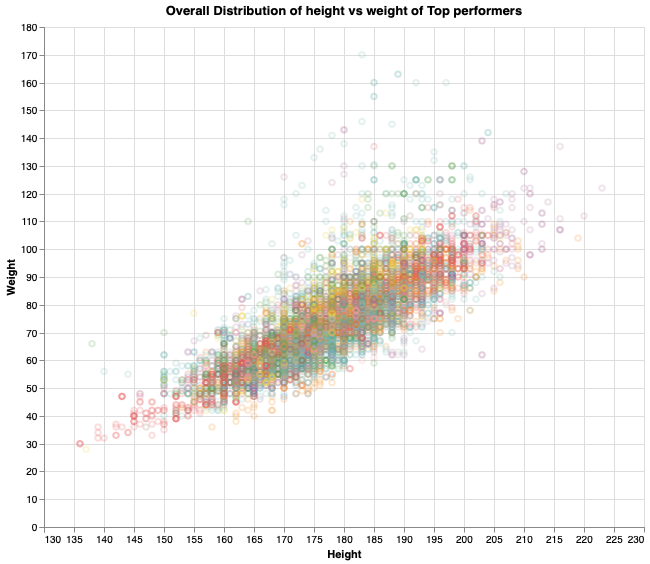

In [28]:
i=i+1
alt.Chart(gold.to_altair()).mark_point(color='green').encode(
x=alt.X('Height:Q',scale=alt.Scale(zero=False)),
y='Weight:Q',
color=alt.Color('Sport:N', legend=None),
opacity=alt.value(.2),
tooltip=['Sport:O','Event:O']
).properties(
height=500,
width=600,
title="Overall Distribution of height vs weight of Top performers")

In [29]:
MenOverTime=merged[(merged.Sex=='M')&(merged.Season=='Summer')]
WomenOverTime=merged[(merged.Sex=='F')&(merged.Season=='Summer')]

In [30]:
i=i+1
menT = alt.Chart(MenOverTime.to_altair()).mark_line(color='red').encode(
x=alt.X('Year:O'),
y='count()').properties(width=500)
i=i+1
womenT = alt.Chart(WomenOverTime.to_altair()).mark_line(color='blue').encode(
x='Year:O',
y='count()').properties(width=500, title = 'No of male and female participants over the years')

In [31]:
main2 = menT + womenT

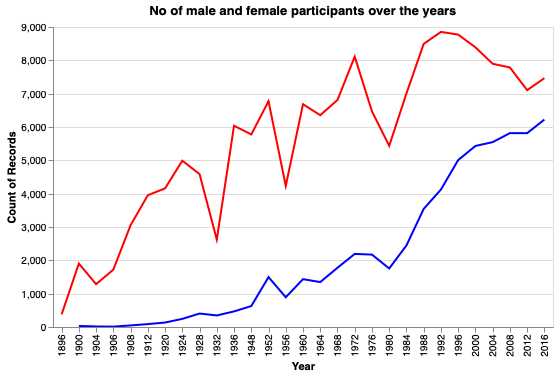

In [32]:
main2

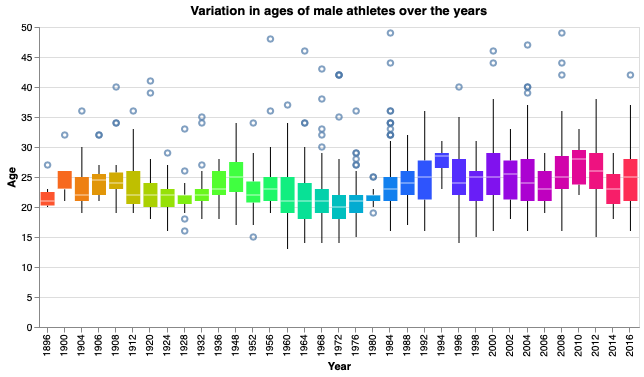

In [33]:
i = i+1
alt.Chart(MenOverTime.to_altair()).mark_boxplot().encode(
x=alt.X('Year:O'),
y='Age:Q',
color=alt.Color('Year:O',scale=alt.Scale(scheme='sinebow'), legend=None)
).properties(width=600,
title="Variation in ages of male athletes over the years")

In [34]:
gold=gold[np.isfinite(gold['Age'])]

In [35]:
gold_USA = gold[gold['NOC']=='USA']

In [36]:
gold_htwt = gold_USA[gold_USA.Height.notnull() & gold_USA.Weight.notnull()]
brush = alt.selection_interval()
plot=alt.Chart(gold_htwt.to_altair()).mark_point().encode(
x='Height:Q',
y='Weight:Q',
#color=alt.condition(brush,'Sport',alt.value('lightgray'),legend=None),
tooltip=['Year:O','Height:Q','Weight:Q','Event:O', 'Sport:O'],
color=alt.Color('Sport:N',legend=None)
                   ).add_selection(
    brush
)

In [37]:
year_slider = alt.binding_range(min=1896, max=2016, step=4, name='Year:')
slider_selection = alt.selection_single(bind=year_slider, fields=['Year'])

In [38]:
plot2 = alt.Chart(gold_htwt.to_altair()).mark_bar().encode(
y='Sport:O',
x='count()',
color=alt.Color('Event:O', legend=None),
tooltip='Event:O').add_selection(
brush
)
plot = plot.add_selection(slider_selection).transform_filter(
slider_selection).properties(
title="Distribution of Height and Weight for Gold Medalists over the years in Summer Olympics", width = 400)
plot2 = plot2.add_selection(slider_selection).transform_filter(
slider_selection).properties()

In [39]:
main3 = plot & plot2

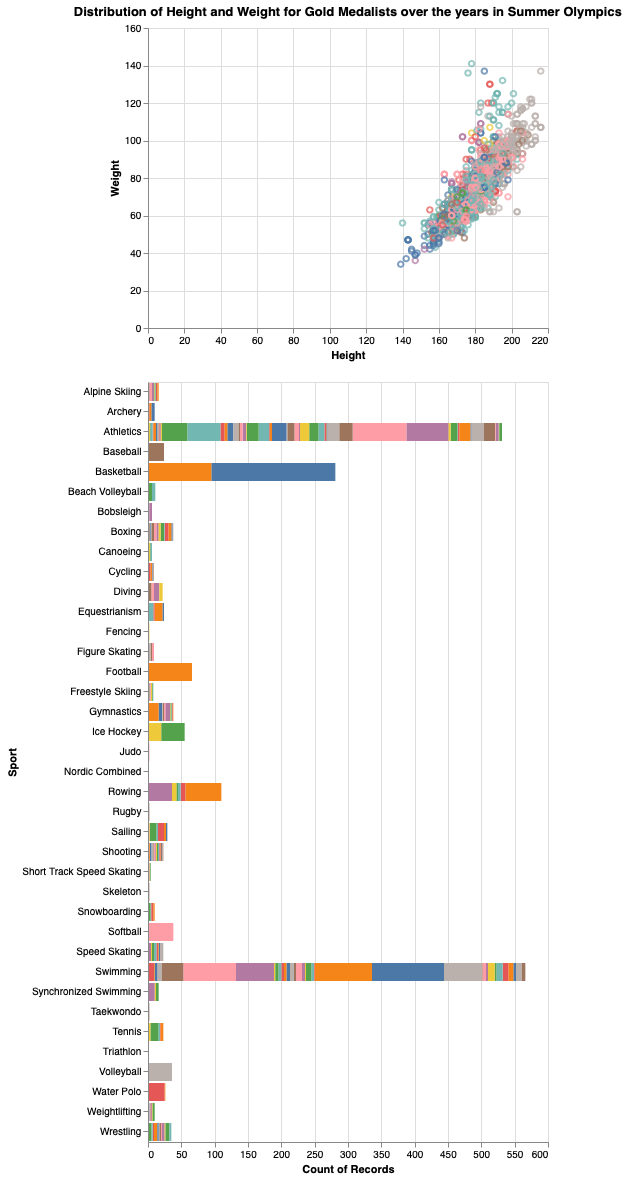

In [40]:
main3

In [41]:
country_dropdown = alt.binding_select(options=gold['region'].unique().tolist())
country_select = alt.selection_single(fields=['region'], bind=country_dropdown, name="Country")
i=i+1
plot4 = alt.Chart(gold.to_altair()).mark_bar().encode(
x = 'Sport:O',
y = alt.Y('count()',title="No of golds medals"),
color = alt.Color('Sport:N', legend=None)
)

In [42]:
main4=plot4.add_selection(country_select, slider_selection).transform_filter(
country_select).transform_filter(slider_selection).properties(width=500)

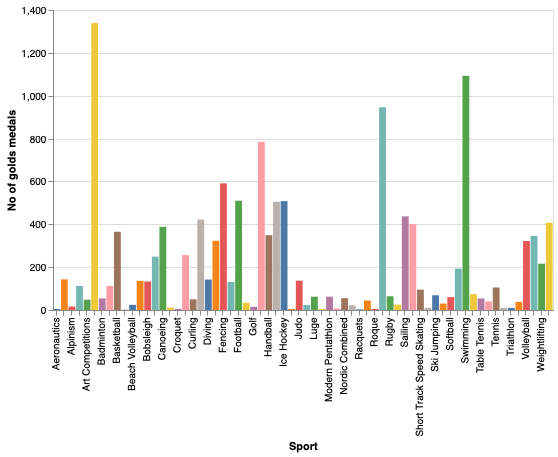

In [43]:
main4